In [1]:
# 비트코인의 가격과 구글 트렌드의 상관관계 분석

In [2]:
import pandas as pd

In [5]:
BTC_price = pd.read_csv('../data/01. Binance_BTCUSDT.csv', header=1, encoding='utf-8')
BTC_price.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT
0,2019-05-05,BTCUSDT,5829.45,5839.9,5760.00,5795.00,3694.12,2.142520e+07
1,2019-05-04,BTCUSDT,5772.69,5900.0,5587.45,5829.45,37187.20,2.145685e+08
2,2019-05-03,BTCUSDT,5492.87,5844.0,5477.57,5772.69,42758.75,2.441994e+08
3,2019-05-02,BTCUSDT,5383.20,5538.0,5370.00,5492.87,21609.98,1.180220e+08
4,2019-05-01,BTCUSDT,5320.81,5402.0,5316.20,5383.20,16414.57,8.789494e+07


In [6]:
BTC_trend = pd.read_csv('../data/01. GoogleTrends_bitcoin.csv', header=1, encoding='utf-8')
BTC_trend.head()

,주,bitcoin: (전 세계)
0,2017-08-20,16
1,2017-08-27,17
2,2017-09-03,18
3,2017-09-10,21
4,2017-09-17,16


In [7]:
BTC_trend.rename(columns={BTC_trend.columns[0] : 'Date'}, inplace=True)
BTC_trend.head()

,Date,bitcoin: (전 세계)
0,2017-08-20,16
1,2017-08-27,17
2,2017-09-03,18
3,2017-09-10,21
4,2017-09-17,16


In [8]:
data_result = pd.merge(BTC_price, BTC_trend, on='Date')
data_result.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,bitcoin: (전 세계)
0,2019-04-28,BTCUSDT,5295.69,5340.00,5259.48,5307.52,13696.93,7.269885e+07,8
1,2019-04-21,BTCUSDT,5291.73,5314.35,5165.00,5256.14,23874.51,1.251640e+08,9
2,2019-04-14,BTCUSDT,5045.22,5152.99,5000.00,5131.30,17426.87,8.826047e+07,9
3,2019-04-07,BTCUSDT,5043.89,5234.00,5026.00,5170.27,35027.71,1.796366e+08,10
4,2019-03-17,BTCUSDT,4005.98,4012.00,3950.01,3981.14,18102.89,7.206302e+07,7


In [9]:
del data_result['Symbol']
del data_result['Open']
del data_result['High']
del data_result['Low']
del data_result['Volume BTC']
del data_result['Volume USDT']

data_result.head()

,Date,Close,bitcoin: (전 세계)
0,2019-04-28,5307.52,8
1,2019-04-21,5256.14,9
2,2019-04-14,5131.30,9
3,2019-04-07,5170.27,10
4,2019-03-17,3981.14,7


In [10]:
del data_result['Date']


In [11]:
data_result.head()

,Close,bitcoin: (전 세계)
0,5307.52,8
1,5256.14,9
2,5131.30,9
3,5170.27,10
4,3981.14,7


In [13]:
data_result.rename(columns={data_result.columns[1] : 'trends'}, inplace=True)
data_result.rename(columns={data_result.columns[0] : 'prices'}, inplace=True)
data_result.head()

,prices,trends
0,5307.52,8
1,5256.14,9
2,5131.30,9
3,5170.27,10
4,3981.14,7


In [15]:
data_result.sort_values(by='prices', ascending=True).head(5)

,prices,trends
17,3228.67,11
10,3458.11,8
13,3476.81,8
12,3539.28,7
18,3545.37,10


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

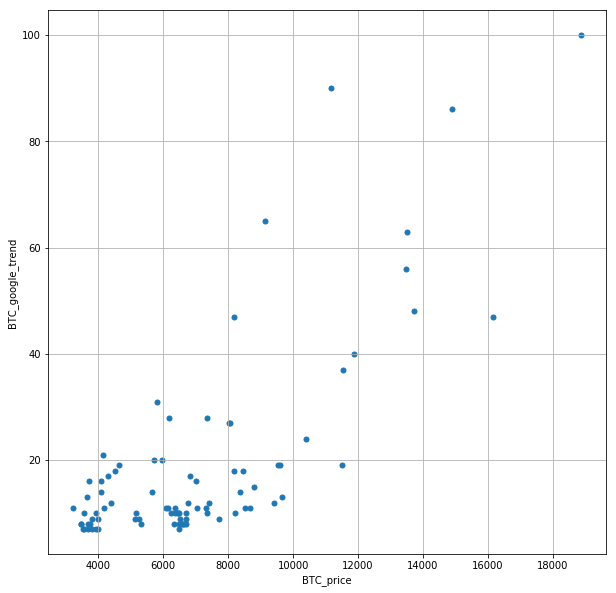

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['prices'], data_result['trends'], s=25)
plt.xlabel('BTC_price')
plt.ylabel('BTC_google_trend')
plt.grid()
plt.show()

In [19]:
import numpy as np

In [20]:
fp1 = np.polyfit(data_result['prices'], data_result['trends'], 1)
fp1

array([ 4.56021283e-03, -1.27235319e+01])

In [21]:
f1 = np.poly1d(fp1)
fx = np.linspace(2000, 20000, 2)

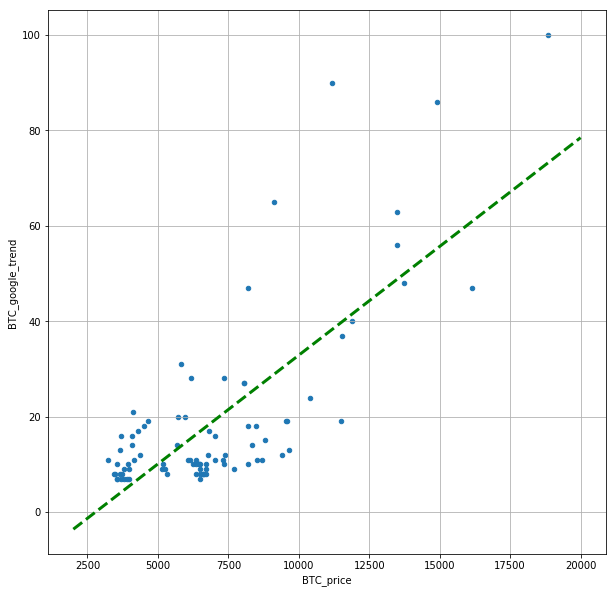

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['prices'], data_result['trends'], s=20)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('BTC_price')
plt.ylabel('BTC_google_trend')
plt.grid()
plt.show()

In [23]:
fp1 = np.polyfit(data_result['prices'], data_result['trends'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(2000, 20000, 2)

data_result['diff'] = np.abs(data_result['trends'] - f1(data_result['prices']))

df_sort = data_result.sort_values(by='diff', ascending=False)
df_sort.head()

,prices,trends,diff
71,11165.41,90,51.806886
72,9128.02,65,36.097818
70,14899.98,86,30.776452
69,18860.02,100,26.717827
62,8184.81,47,22.399056


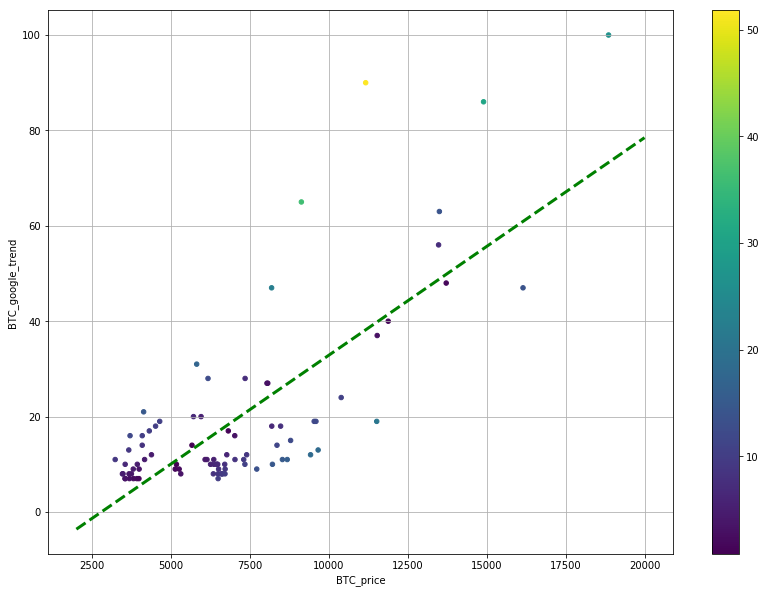

In [24]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['prices'], data_result['trends'], c=data_result['diff'], s=20)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.xlabel('BTC_price')
plt.ylabel('BTC_google_trend')

plt.colorbar()
plt.grid()
plt.show()